# Exploratory Data Analysis - Haberman’s Cancer Survival Dataset

***Understanding the dataset***

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

There are 4 attribites in this dataset out of which 3 seem to be features/characteristics of patients in this study. The last attribute corresponds to whether or not a particular patient survived for more than 5 years or died within 5 years of the surgery for breat cancer.

Haberman's dataset specifies that some patients were found to have anywhere between 0 to 52 cancer positive auxillary lymph nodes. 

What this means is that having cancer cells in auxillary(under the armpit) lymph nodes means one's cancer is considered lymph node-positive. Based on TNM staging, tumor would be called either N1, N2, or N3 depending on how many lymph nodes contain cancer cells and how far away from the tumor the positive nodes are found.

* N1: Positive- 1 to 3 auxillary lymph nodes have cancer cells.
* N2: Positive- 4 to 9 auxillary lymph nodes have cancer cells.
* N3: Positive- 10 or more auxillary lymph nodes have cancer cells.

Sources:
* https://www.cancer.ca/en/cancer-information/cancer-101/what-is-cancer/stage-and-grade/staging/?region=on
* https://www.verywellhealth.com/lymph-node-positive-breast-cancer-429953


***Attribute Information***
1. age - Age of patient at the time of surgery. A numerical value
2. year - Year in which patient had undergone the surgery. A numerical value.
3. nodes - No.of cancer positive auxillary lymph nodes detected. A numerical value
4. status - Specifies whether the patient survived for more than 5 years or died within 5 years of the surgery. This also serves as our class attribute.

Source :https://www.kaggle.com/gilsousa/habermans-survival-data-set)


## ***OBJECTIVE***

To predict whether the patient will survive for more than 5 years or will die within 5 years of the surgery based on analysing their age, year of treatment and the number of positive auxillary lymph nodes found in their body.



In [57]:
# Importing necessary libraries that I'll be working with throughout this assignment

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Haberman Data set

In [3]:
from google.colab import files
uploaded = files.upload()

Saving haberman.csv to haberman.csv


In [58]:
import io

# Reading Haberman Cancer Survival Dataset as a pandas dataframe

haberman = pd.read_csv(io.BytesIO(uploaded['haberman.csv']))
print(haberman)

     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2
305   83    58      2       2

[306 rows x 4 columns]


In [59]:
# Get dimension of the dataframe

print(haberman.ndim)

2


In [60]:
# Get how many datapoints(rows) and features(columns) are there in the dataframe

print(haberman.shape)

(306, 4)


In [61]:
# Get list of all column names in the dataframe

print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


Let's make column names more descriptive and readable. One way to do that is to use a pandas library method- rename() which takes dictionary of columns as input and returns renamed dataframe.

Source: 
https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.rename.html


In [65]:
# Rename columns of dataframe

haberman.rename(columns={'age':'patient_age', 'year':'surgery_year', 'nodes':'positive_nodes', 'status':'survival_status'}, inplace=True)

In [66]:
# Get first 10 datapoints of newly renamed dataframe

print(haberman.head(10))

   patient_age  surgery_year  positive_nodes  survival_status
0           30            64               1                1
1           30            62               3                1
2           30            65               0                1
3           31            59               2                1
4           31            65               4                1
5           33            58              10                1
6           33            60               0                1
7           34            59               0                2
8           34            66               9                2
9           34            58              30                1


In [68]:
# Get information about the dataframe

print(haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   patient_age      306 non-null    int64
 1   surgery_year     306 non-null    int64
 2   positive_nodes   306 non-null    int64
 3   survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


In [71]:
# Get how many patients survived more than 5 years and how many died within 5 years of surgery

haberman["survival_status"].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

In [72]:
# Check if the dataset has any missing or null values

print(haberman.isnull().sum())

patient_age        0
surgery_year       0
positive_nodes     0
survival_status    0
dtype: int64


**Observations:**

* There are no missing values in this dataset i.e. no NaN values in any column.
* 225 patients out of 306 survived more than 5 years and 81 patients died within 5 years after surgery i.e. 73.53% of patients survived more than 5 years after surgery.
* We can derive that survival_status=1 means the patient had survived more than 5 years after the treatment and survival_status=2 means the patient did not survive. We can map accordingly.
* Data type of all columns is integer.
* This is an *imbalanced dataset* as no.of datapoints for two classes differ vastly.


## Mean, Variance and Standard Deviation:

In [73]:
print(haberman.describe())

       patient_age  surgery_year  positive_nodes  survival_status
count   306.000000    306.000000      306.000000       306.000000
mean     52.457516     62.852941        4.026144         1.264706
std      10.803452      3.249405        7.189654         0.441899
min      30.000000     58.000000        0.000000         1.000000
25%      44.000000     60.000000        0.000000         1.000000
50%      52.000000     63.000000        1.000000         1.000000
75%      60.750000     65.750000        4.000000         2.000000
max      83.000000     69.000000       52.000000         2.000000


**Observations:**

* Maximum and minimum ages of patients who survived the treatment are 77 & 30 respectively.
* 25% of patients have no positive lymph nodes and have the highest survival chances.
* Patient's age ranges between 30 to 83 with 52 as average age.
* ~ 75% of patients have <= 4 positive auxillary nodes.

# Univariate Analysis

### 1D Scatter Plots

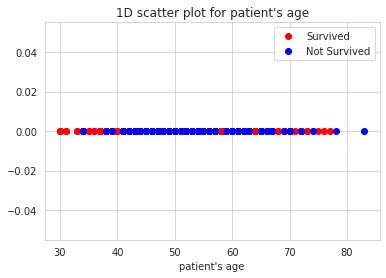

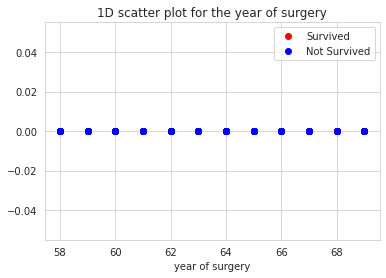

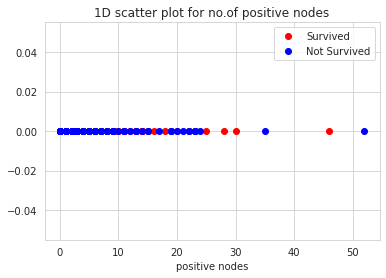

In [122]:
# Create separate dataframes for different classes in survival_status column

survived = haberman.loc[haberman['survival_status'] == 1]
not_survived = haberman.loc[haberman['survival_status'] == 2]

# Plot 1D scatter plots for each of the features attributes: patient_age, surgery_year, positive_nodes

plt.figure(1)
plt.plot(survived['patient_age'], np.zeros_like(survived['patient_age']),'ro', label='Survived')
plt.plot(not_survived['patient_age'], np.zeros_like(not_survived['patient_age']), 'bo', label='Not Survived')
plt.title('1D scatter plot for patient\'s age')
plt.xlabel('patient\'s age')
plt.legend()

plt.figure(2)
plt.plot(survived['surgery_year'], np.zeros_like(survived['surgery_year']),'ro', label='Survived')
plt.plot(not_survived['surgery_year'], np.zeros_like(not_survived['surgery_year']), 'bo', label='Not Survived')
plt.title('1D scatter plot for the year of surgery')
plt.xlabel('year of surgery')
plt.legend()

plt.figure(3)
plt.plot(survived['positive_nodes'], np.zeros_like(survived['positive_nodes']),'ro', label='Survived')
plt.plot(not_survived['positive_nodes'], np.zeros_like(not_survived['positive_nodes']), 'bo', label='Not Survived')
plt.title('1D scatter plot for no.of positive nodes')
plt.xlabel('positive nodes')
plt.legend()

plt.show()

**Observations:**

* By looking at above plots, we are not able to find any distinguishable features among patient's age, positive nodes and his/her survival status.
* Since there's so much overlapping, there's no way to determine how many data points are there between intervals.

### Histograms & Probability Density Function(PDF)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


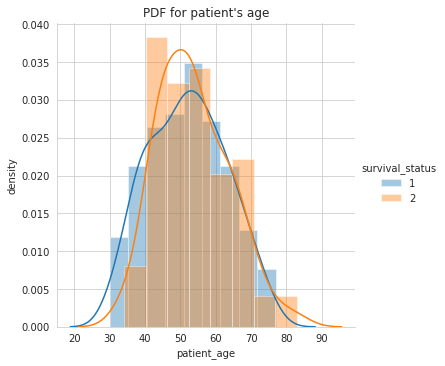

In [120]:
# Plot survival status based on patient's age using Probability Density Function(PDF)

sns.FacetGrid(haberman, hue="survival_status", height=5) \
   .map(sns.distplot, "patient_age") \
   .add_legend();
plt.title('PDF for patient\'s age')
plt.ylabel('density')

plt.show();

**Observations:**

* Even though the overlap is quite high, we can say that patients aged 20-40 seem to have high chance of survival 
* The overlap with the non-survival curve might be because of high positive auxillary nodes (I will explore more on this in bivariate analysis section).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


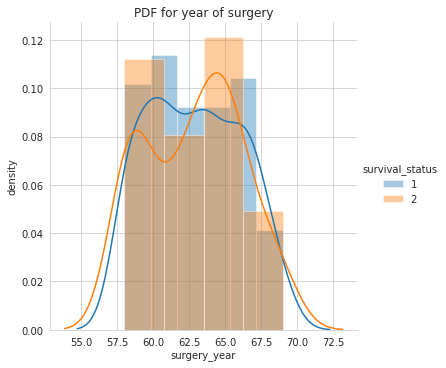

In [119]:
# Plot survival status based on year of surgery using Probability Density Function(PDF)

sns.FacetGrid(haberman, hue="survival_status", height=5) \
   .map(sns.distplot, "surgery_year") \
   .add_legend();
plt.title('PDF for year of surgery')
plt.ylabel('density')

plt.show();

**Observations:**

Overlap is huge. The year of surgery can not be dependent for further analysis.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


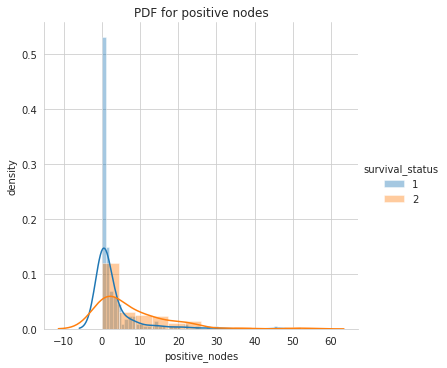

In [118]:
# Plot survival status based on positive nodes using Probability Density Function(PDF)

sns.FacetGrid(haberman, hue="survival_status", height=5) \
   .map(sns.distplot, "positive_nodes") \
   .add_legend();
plt.title('PDF for positive nodes')
plt.ylabel('density')
plt.show();

**Observations:**

* Patient's with =< 0 positive nodes have unprecedented chances of survival.
* Survival chances gradually decrease with increasing no.of positive nodes

## Box Plots and Whiskers

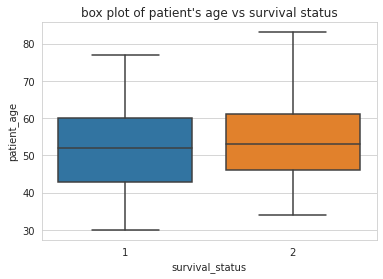

In [117]:
# Boxplot using patient's age

sns.boxplot(x='survival_status',y='patient_age', data=haberman)
plt.title('box plot of patient\'s age vs survival status')
plt.show()

**Observations:**

Plotting survival status based on patient's age is not helpful to distinguish between the classes as they have almost same median and their 25th to 75th percentile also almost overlapping.

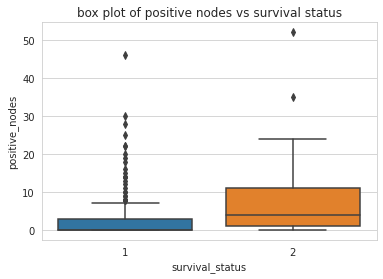

In [115]:
# Boxplot using no.of positive nodes a patient has

bp1 = sns.boxplot(x='survival_status',y='positive_nodes', data=haberman)
plt.title('box plot of positive nodes vs survival status')
plt.show()

**Observations:**

* Patients with positive nodes less then 5 tend to survive.
* 75 percentile of patients who survived have less than 4 positive nodes. 50 percentile of patients who could not survive have higher no.of positive nodes
* As we've seen before, having less positive nodes is a dominant factor in determining the survival rate of the patient.
* There seem to be high number of outlier datapoints in the postive nodes feature.

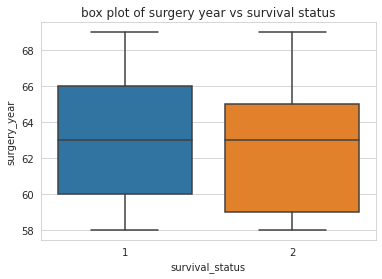

In [116]:
# Boxplot using the year of surgery

sns.boxplot(x='survival_status',y='surgery_year', data=haberman)
plt.title('box plot of surgery year vs survival status')
plt.show()

**Observations:**

Plotting survival status based on the year of surgery is not helpful to distinguish between the classes as they have almost same median and their 25th to 75th percentile are also almost overlapping.

## Violin Plots

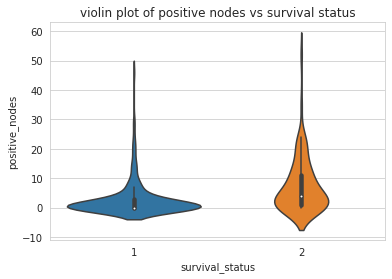

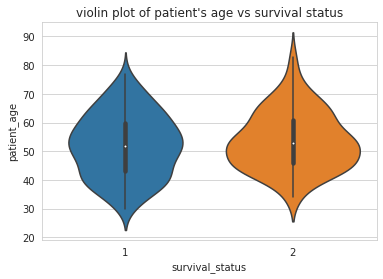

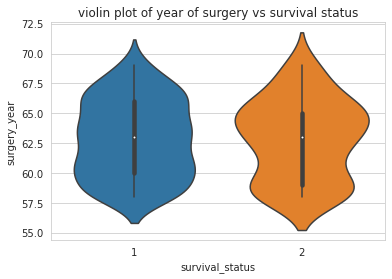

In [83]:
# Violin plot of positive nodes vs survival status

sns.violinplot(x="survival_status", y="positive_nodes", data=haberman, size=10)
plt.title('violin plot of positive nodes vs survival status')
plt.show()

# Violin plot of patient's age vs survival status

sns.violinplot(x="survival_status", y="patient_age", data=haberman, size=10)
plt.title('violin plot of patient\'s age vs survival status')
plt.show()

# Violin plot of year of surgery vs survival status

sns.violinplot(x="survival_status", y="surgery_year", data=haberman, size=10)
plt.title('violin plot of year of surgery vs survival status')
plt.show()

**Observations:**

* For fig(1), the survival rate is centered around 0-7 nodes. This asserts the inference that lesser nodes means more survival rate.
* For fig(2), it is clear that the Age attribute is normally distributed. However given significant overlap, patient's age alone should not be a deciding factor concluding the chances of survival.
* For fig(3), it is very hard to classify both classes of patients as thete's a significant overlap.

## Cumulative Distribution Function(CDF)

In [84]:
survived = haberman.loc[haberman['survival_status'] == 1]
not_survived = haberman.loc[haberman['survival_status'] == 2]

print(haberman.columns)

Index(['patient_age', 'surgery_year', 'positive_nodes', 'survival_status'], dtype='object')


bin_edges:  [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
pdf:  [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]


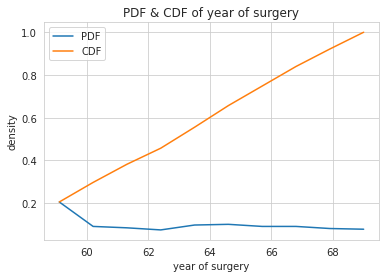

In [108]:
# Plot PDF & CDF based on the year of surgery

counts, bin_edges = np.histogram(haberman['surgery_year'], bins=10, density=True)
pdf = counts/sum(counts)
print('bin_edges: ', bin_edges)
print('pdf: ', pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['PDF', 'CDF'])
plt.title('PDF & CDF of year of surgery')
plt.xlabel('year of surgery')
plt.ylabel('density')
plt.show()

bin_edges:  [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
pdf:  [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]


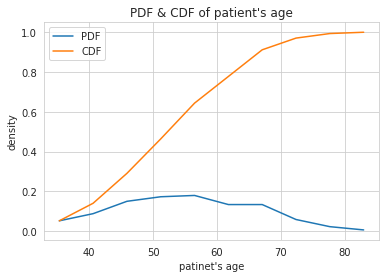

In [109]:
# Plot PDF & CDF based on patient's age

counts, bin_edges = np.histogram(haberman['patient_age'], bins=10, density=True)
pdf = counts/sum(counts)
print('bin_edges: ', bin_edges)
print('pdf: ', pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['PDF', 'CDF'])
plt.title('PDF & CDF of patient\'s age')
plt.xlabel('patinet\'s age')
plt.ylabel('density')
plt.show()

bin_edges:  [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
pdf:  [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]


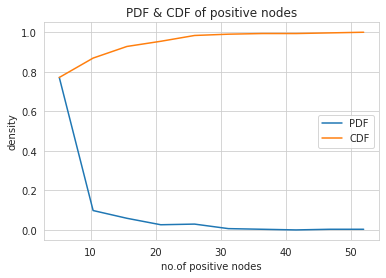

In [110]:
# Plot PDF & CDF based on no.of positive auxillary nodes

counts, bin_edges = np.histogram(haberman['positive_nodes'], bins=10, density=True)
pdf = counts/sum(counts)
print('bin_edges: ', bin_edges)
print('pdf: ', pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['PDF', 'CDF'])
plt.title('PDF & CDF of positive nodes')
plt.xlabel('no.of positive nodes')
plt.ylabel('density')
plt.show()

**Observations:**

* From above CDF curves, we can say that there's around 85% chance of survival if number of axillary nodes detected are < 5.
* Its observed that 80% — 85% of people have good chances of survival if they have less number of axillary nodes detected.
* And that 100% of the people are not likely to survive if they have 40 or more positive nodes.


# Multivariate Analysis - Contour Plot.


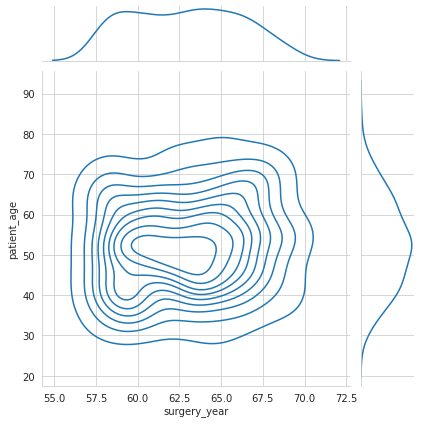

In [89]:
# Contour plot with survival stauts based on patient's age and surgery year

sns.jointplot(x="surgery_year",y="patient_age",data=haberman, kind="kde")
plt.show()

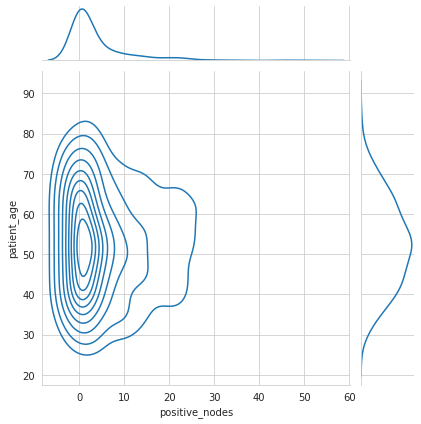

In [90]:
# Contour plot with survival stauts based on patient's age and no.of positive nodes

sns.jointplot(x="positive_nodes", y="patient_age", data=haberman, kind="kde");
plt.show()

**Observations:**

* Fig(1), overlap is huge. Patient's age and the year of surgery are not dependent factors for predicting survival status.
* Fig(2), reiterates that the lesser no.of positive nodes the higher chance of survival. Patient's age even distributed so no concrete conclusions can be drawn.

# Bivariate Analysis

## 2-D Scatter Plot

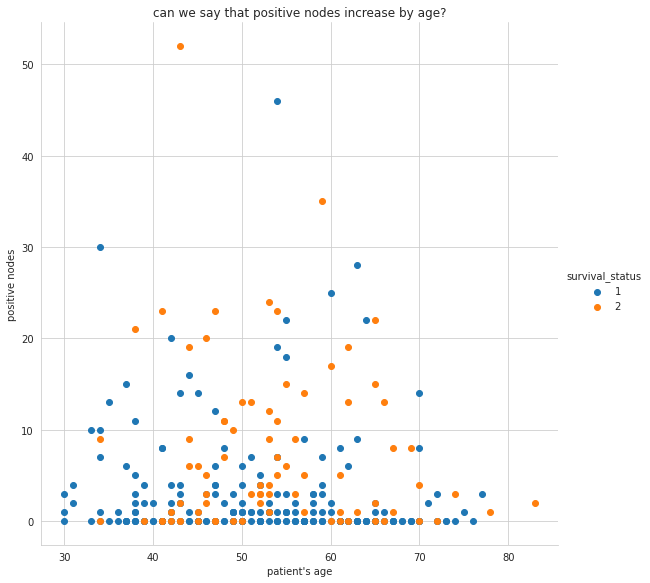

In [91]:
# Plot a 2D scatter plot with patient's age and no.of positive nodes 

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival_status", height=8) \
   .map(plt.scatter, "patient_age", "positive_nodes") \
   .add_legend();
plt.xlabel("patient's age")
plt.ylabel("positive nodes")
plt.title('can we say that positive nodes increase by age?')

plt.show();

**Observations:**

* Patients with 0 positive nodes seem to have the highest chance of survival irrespective of their age.
* Patients whose age is <=30 are most likely to survive. 
* We can also conclude that patients between 30-40 years of age are also somewhat likely to survive except a few cases where positive nodes are high.
* Blue and Orange data points cannot be easily seperated.
* There is too much over lapping so no other significant observations can be made from this 2D scatter plot.


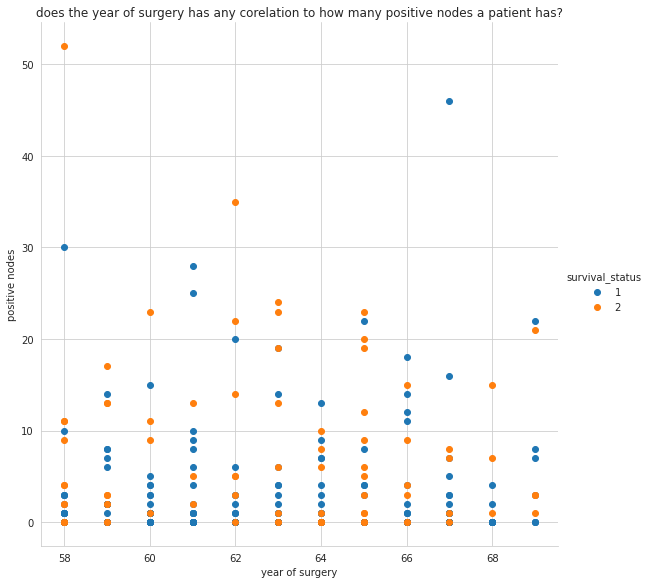

In [96]:
# Plot a 2D scatter plot with year of surgery and no.of positive nodes 

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival_status", height=8) \
   .map(plt.scatter, "surgery_year", "positive_nodes") \
   .add_legend();
plt.xlabel("year of surgery")
plt.ylabel("positive nodes")
plt.title('does the year of surgery has any corelation to how many positive nodes a patient has?')

plt.show();

**Observations:**

Although it does seem like patients with less no.of positive nodes will survive regardless of age, there's no way in above plot to linearly separate the classes of patients.


## Pair Plots

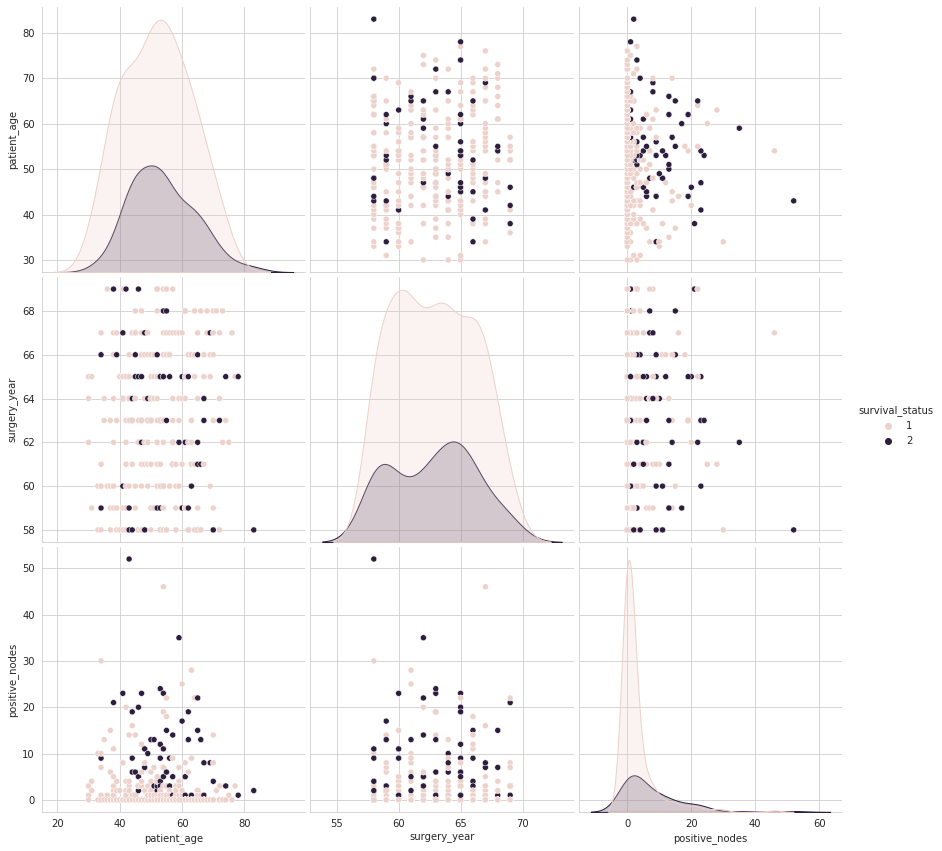

In [100]:
# Create a pair plot with all 3 feature attributes

sns.set_style("whitegrid")
sns.pairplot(haberman, hue="survival_status", height = 4)

plt.show()

**Observations:**

Even after using pair plots we are not able accurately classify the survival rates of the patients.

> However, when we analyse the plot between age and nodes, it seems that patients between age of 25 to 40 have very high chance of survival if positive nodes are < 20

* Also, looking at age and positive nodes pattern, patients between ages 45-70 with 10 or more positive have very less chance of survival.
* And patients with ages <=40 with lesser positive auxillary nodes have high chances of survival.


# CONCLUSIONS

* Although patients who are guaranteed to survive have 0 positive nodes, this is not always the case as there're still a small percentage of patients who died within 5 years of surgery even though they had 0 positive nodes.

* Patients with more than 1 positive auxillary nodes are less likely to survive. Higher the no.of positive nodes the lesser the chance of survival irrespective of age.

* Patient's age and positive nodes are the best parameters for predicting the survival rate.

* Even though patients under 30 years of age mostly survived, age should not be the only factor in deciding the survival rate.

* As the dataset is imbalanced and there's a lot of overlapping between different features, higher level of analysis is required to come to a concrete conclusion and build a model that predicts accurate survival rates.